## Predicting Song Popularity by Analyzing Spotify Data

In [1]:
import pandas as pd
import numpy as np

# We need Scikit-learn later - we'll uncomment this later and import specific modules for speed
# import sklearn

import seaborn as sns
from matplotlib import pyplot as plt

### Loading the data and making general observations
First, we load the data in

In [2]:
data = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

Let's view the head and tail and see if we can observe anything.

In [3]:
data.head(50)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
5,Curbo,26Y1lX7ZOpw9Ql3gGAlqLK,Debauchery - Original mix,0.001150,0.810,124016,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0
6,Bingo Play,5eIyK73BrxHLnly4F9PWqg,Grandma - Original mix,0.000539,0.819,132742,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,181838,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,124016,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
9,Chris Cooq,049RxG2laEl9U1PGYeIqLV,Hazard - Original mix,0.000081,0.813,132742,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0


In [4]:
data.tail(50)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130613,Felipe Araújo,5EKHbW7mXcAR4hCyS3YXjb,Atrasadinha - Ao Vivo,0.498000,0.676,172767,0.8440,0.000000,7,0.8660,-3.396,1,0.1090,159.969,4,0.7160,83
130614,Isabela Moner,0YUlezPOv2Y5OiN3WZaZaW,I'll Stay - from Instant Family,0.023000,0.544,207760,0.5730,0.000000,1,0.1030,-6.936,1,0.0297,94.143,4,0.3490,59
130615,Ninja Sex Party,19bZB2AbnfqhLzgO0q9TpC,Orgy for One,0.064800,0.578,203150,0.9100,0.000000,2,0.3110,-2.307,1,0.0637,133.055,4,0.8230,51
130616,Metro Boomin,2VCXaStTlLpvxJh3sqA0Hr,Borrowed Love - Instrumental,0.444000,0.624,230240,0.2910,0.877000,11,0.2390,-13.459,0,0.0996,194.011,4,0.2510,48
130617,Emmanuelle Rimbaud,3Le8dA7PwImsZxRgEnwnt6,Hopes and Dreams,0.980000,0.298,164649,0.0462,0.941000,8,0.1250,-28.427,1,0.0400,61.299,4,0.2800,61
130618,Elley Duhé,60uwjx3zc93kVyUtNxVOsi,SAVIOR,0.045900,0.846,203560,0.6920,0.000000,9,0.1270,-3.303,1,0.0623,123.950,4,0.2280,46
130619,khai dreams,6G4WyEppR26jbZGyM5tB7d,All I Need,0.508000,0.760,147967,0.5590,0.000000,11,0.3670,-7.274,0,0.4990,74.954,4,0.4800,53
130620,Nick Mulvey,7tJHvRoGvkckZkZk5ORUot,In Your Hands - Single Version,0.605000,0.605,230164,0.5980,0.009990,3,0.1570,-9.263,1,0.0323,105.945,4,0.7530,61
130621,Felguk,0ySn4jIZDiQfDN5R1WlUvh,Pretty Baby,0.023800,0.658,201848,0.9130,0.623000,11,0.0747,-4.890,0,0.0509,123.998,4,0.7110,40
130622,Peach Tree Rascals,1c57sAKlEMZyDXE89RgUWz,Someday,0.691000,0.494,354873,0.3440,0.112000,2,0.1260,-9.379,1,0.0532,113.822,3,0.3290,50


We probably don't need the track id, so we should drop it.

In [5]:
data = data.drop(['track_id'], axis = 1)

Let's get a description of the data to get a feel for the range and type of value. After that, we can observe the shape to see how much data we actually have, and use the info() function in pandas to see if there are any null values in any of the columns of our dataset.

In [6]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [7]:
data.shape

(130663, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 16 columns):
artist_name         130663 non-null object
track_name          130663 non-null object
acousticness        130663 non-null float64
danceability        130663 non-null float64
duration_ms         130663 non-null int64
energy              130663 non-null float64
instrumentalness    130663 non-null float64
key                 130663 non-null int64
liveness            130663 non-null float64
loudness            130663 non-null float64
mode                130663 non-null int64
speechiness         130663 non-null float64
tempo               130663 non-null float64
time_signature      130663 non-null int64
valence             130663 non-null float64
popularity          130663 non-null int64
dtypes: float64(9), int64(5), object(2)
memory usage: 16.0+ MB


None of the columns are null, which is pretty convenient.



### Brief Explanation and Analysis of some of the Columns

These explanations are taken directly from the Spotify Website
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

##### Acousticness: 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

##### Danceability: 
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

##### Duration_ms:
It is the duration of the track in milliseconds. We might want to convert this to seconds later.

##### Energy: 
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Loudness, timbre, onset rate and general entropy are some of the features contributing to this. 

##### Instrumentalness:
Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

##### Key:
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation.
https://en.wikipedia.org/wiki/Pitch_class
Note: If there was no key detected, a value of -1 was assigned.

##### Liveness: 
Detects whether the song was played live by looking for audience in the background. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

##### Loudness:
The overall loudness of a track in decibels (dB), averaged across the entire track. Loudness directly relates to amplitude. Values typical range between -60 and 0 db.  

##### Mode:
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

##### Speechiness:
Speechiness detects the presence of spoken words in a track. Values > 0.66 indicate that the song pretty much contains spoken words everywhere. Values < 0.33 indicate that the track is mostly music and represent non-speech like sounds.

##### Tempo: 
The overall estimated tempo of a track in beats per minute (BPM). Tempo is the speed or pace of a given piece and derives directly from the average beat duration.

##### Time_Signature:
The time signature is a notational convention used in Western musical notation to specify how many beats are contained in each measure, and which note value is equivalent to a beat. 

##### Valence:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy), while tracks with low valence sound more negative (eg. sad) 

##### Popularity:
A popularity score between 0 to 100, describing how popular a track is.

### Modifying columns and rows

The time in milliseconds isn't that readable, so lets convert it to seconds.

In [9]:
data['duration_seconds'] = data['duration_ms'] / 1000
data[['artist_name', 'track_name', 'duration_seconds']].head()

,artist_name,track_name,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238.373
1,YG,BAND DRUM (feat. A$AP Rocky),214.800
2,R3HAB,Radio Silence,138.913
3,Chris Cooq,Lactose,125.381
4,Chris Cooq,Same - Original mix,124.016


In [10]:
data = data.drop(['duration_ms'], axis = 1)
data.head()

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15,238.373
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0,214.800
2,R3HAB,Radio Silence,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56,138.913
3,Chris Cooq,Lactose,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0,125.381
4,Chris Cooq,Same - Original mix,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0,124.016


Let's see if there are any duplicates.

In [11]:
len(data) - len(data.drop_duplicates())

0

There are no duplicates, so we don't need to drop any rows.

### Statistical Analysis

Let's see how popularity relates to various features. First, we'll see how popularity relates to danceability.

In [12]:
color_list = ['#8ec6ff', '#8eff9f']
color_palette = sns.color_palette(color_list)
sns.set_palette(color_palette)
sns.set_style('white')

In [13]:
highly_popular = data[data['popularity'] > 50]['danceability']
low_popular = data[data['popularity'] <= 50]['danceability']

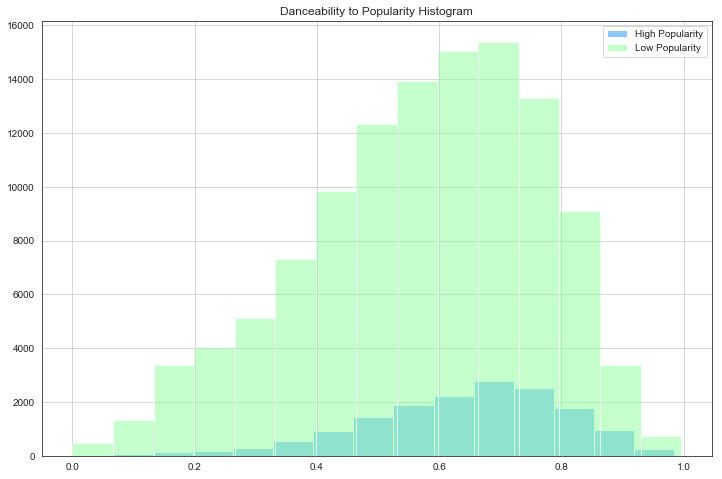

In [14]:
fig = plt.figure(figsize = (12, 8))
plt.title("Danceability to Popularity Histogram")
highly_popular.hist(alpha = 1, bins = 15, label = 'High Popularity')
low_popular.hist(alpha = 0.5, bins = 15, label = 'Low Popularity')
plt.legend(loc = 'upper right')

Not a clear correlation or anything, but around 0.7 danceability seems to have the most number of popular songs, which means a high danceability is what most users like, but not too high, nor too low.

Text(0, 0.5, 'Popularity')

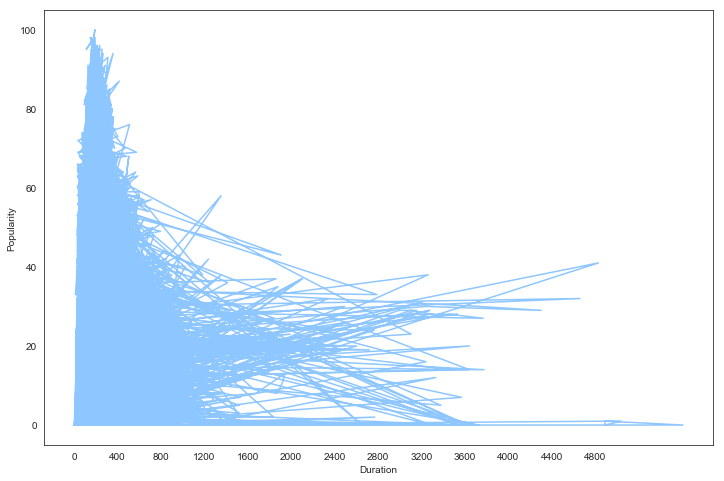

In [22]:
color_palette = sns.color_palette(color_list)
sns.set_palette(color_palette)
sns.set_style('white')

fig2 = plt.figure(figsize = (12, 8))
plt.xticks(np.arange(0, 5000, 400))
plt.plot(data['duration_seconds'],data['popularity'])
plt.xlabel('Duration')
plt.ylabel('Popularity')

In general, songs around 200 seconds to 300 seconds (3.5 to 5 minutes) are the most popular. Songs that are a lot less than that or a lot more are much lower in popularity. There is a sudden surge around the 3000 to 4000 second mark, possibly podcasts?